# Biodiversity in National Parks

This project will primarily focus on the endangered status of various species in national parks. Since this project is a repurposed verion of an older Codecademy project, I will use that version as a guide to complete this assignment, with my own spin.

The assignment's instructions are as follows:

*"You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way."*

Two CSV files are given: `observations.csv` and `species_info.csv`. To begin, we should import the packages that are relevant to this assignment. This was **Step 1** of the original project.

In [218]:
import pandas as pd # dataframe library
import seaborn as sns # "advanced" plotting library
from matplotlib import pyplot as plt # "basic" plotting library

This file henceforth will follow the original project's instructions, alongside original insights.

## Step 2
You have been given two CSV files. `species_info.csv` with data about different species in our National Parks, including:

- The scientific name of each species
- The common names of each species
- The species conservation status

Load the dataset and inspect it:

- Load `species_info.csv` into a DataFrame called species

In [219]:
species = pd.read_csv("species_info.csv")

Inspect each DataFrame using `.head()`.

In [220]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


*The `species` dataframe notably has the conversation status listed as `NaN` for at least the first five rows. Using the below code....*

In [221]:
null_sum = species["conservation_status"].isnull().sum()
total_rows = len(species)
percent = null_sum / total_rows * 100.0
print("Total Number of Rows: " + str(total_rows))
print("Total null obervations in \"conversation_status\": " + str(null_sum))
print("Percent of \"conservation_status\" rows that are null: " + str(percent) + "%")

Total Number of Rows: 5824
Total null obervations in "conversation_status": 5633
Percent of "conservation_status" rows that are null: 96.72046703296702%


*...we can see that almost all values in the column are listed this way. Could there be a reasonable explanation for this?*

## Step 3
Let's start by learning a bit more about our data. Answer each of the following questions.

How many different species are in the `species` DataFrame?

In [222]:
print(species["scientific_name"].nunique())

5541


What are the different values of `category` in `species`?

In [223]:
print(species["category"].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


What are the different values of `conservation_status`?

In [224]:
print(species["conservation_status"].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


*The conversation_status variable has four unique values aside from `NaN`, all of which describe various states of endangerment and recovery. This could imply the NaN values represent a species of least concern to the NPS.* 

*It should also be noted that the number of unique species is 283 less than the total number of rows in the dataframe. This could imply the prescence of duplicate data in the dataframe.*

In [225]:
print(species.duplicated(keep='first').sum())
species_columns = species.columns
print(species_columns)
print(species.duplicated(subset=species.columns[:-1], keep='first').sum())
print(species.duplicated(subset=species.columns[:-2], keep='first').sum())
print(species.duplicated(subset=species.columns[:-3], keep='first').sum())
species.drop_duplicates(subset=['scientific_name'], inplace=True)

0
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
2
283
5817


*The dataframe does not have any duplicate rows according to the strict definition, but narrowing the columns, there seems to be a degree of error in the data. For now, the duplicate species rows have been removed from the dataset. This could be further explored, but the other CSV file appears to imply that both tables should be joined somehow, thus explaining the duplicate species rows.*

## Step 4
Let's start doing some analysis!

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currnetly neither in danger of extinction throughout all or a significant portion of its range

We'd like to count up how many species meet each of these criteria.  Use `groupby` to count how many `scientific_name` meet each of these criteria.

In [226]:
print(species.groupby("conservation_status")["scientific_name"].nunique().reset_index())

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                3
2  Species of Concern              151
3          Threatened                9


As we saw before, there are far more than 200 species in the `species` table.  Clearly, only a small number of them are categorized as needing some sort of protection.  The rest have `conservation_status` equal to `None`.  Because `groupby` does not include `None`, we will need to fill in the null values.  We can do this using `.fillna`.  We pass in however we want to fill in our `None` values as an argument.

Paste the following code and run it to see replace `None` with `No Intervention`: `species.fillna('No Intervention', inplace=True)`

In [227]:
species.fillna('No Intervention', inplace=True)

Great! Now run the same `groupby` as before to see how many species require `No Intervention`.

In [228]:
print(species.groupby("conservation_status")["scientific_name"].nunique().reset_index())

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                3
2     No Intervention             5363
3  Species of Concern              151
4          Threatened                9


Let's use `plt.bar` to create a bar chart.  First, let's sort the columns by how many species are in each categories.  We can do this using `.sort_values`.  We use the the keyword `by` to indicate which column we want to sort by.

Paste the following code and run it to create a new DataFrame called `protection_counts`, which is sorted by `scientific_name`:
```
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')
```

In [229]:
protection_counts = species.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')
print(protection_counts)

  conservation_status  scientific_name
1         In Recovery                3
4          Threatened                9
0          Endangered               15
3  Species of Concern              151
2     No Intervention             5363


Now let's create a bar chart!
1. Start by creating a wide figure with `figsize=(10, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `scientific_name` column of `protection_counts`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `conservation_status` in `protection_counts`
5. Label the y-axis `Number of Species`
6. Title the graph `Conservation Status by Species`
7. Plot the grap using `plt.show()`

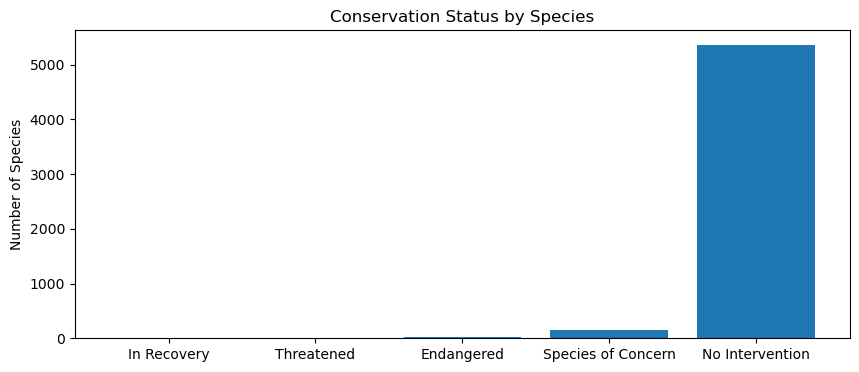

In [230]:
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(protection_counts)), protection_counts["scientific_name"].values)
ax.set_xticks(range(len(protection_counts)))
ax.set_xticklabels(protection_counts["conservation_status"].values)
plt.ylabel("Number of Species")
plt.title("Conservation Status by Species")
plt.show()

*This graph clearly demonstrates that a great majority of the species in the dataset require no intervention.*

# Step 4
Are certain types of species more likely to be endangered?

Let's create a new column in `species` called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [231]:
species["is_protected"] = species["conservation_status"].apply(lambda v: True if v != "No Intervention" else False)
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


Let's group the `species` data frame by the `category` and `is_protected` columns and count the unique `scientific_name`s in each grouping.

Save your results to `category_counts`.

In [232]:
category_counts = species.groupby(["category", "is_protected"]).nunique().reset_index()

Examine `category_counts` using `head()`.

In [233]:
print(category_counts.head())

    category  is_protected  scientific_name  common_names  conservation_status
0  Amphibian         False               72            72                    1
1  Amphibian          True                7             7                    3
2       Bird         False              413           379                    1
3       Bird          True               75            75                    3
4       Fish         False              115           112                    1


It's going to be easier to view this data if we pivot it.  Using `pivot`, rearange `category_counts` so that:
- `columns` is `is_protected`
- `index` is `category`
- `values` is `scientific_name`

Save your pivoted data to `category_pivot`. Remember to `reset_index()` at the end.

In [234]:
category_pivot = category_counts.pivot(columns="is_protected", index="category", values="scientific_name").reset_index()

Examine `category_pivot`.

In [235]:
print(category_pivot)

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    10
3                        Mammal    146    30
4             Nonvascular Plant    328     5
5                       Reptile     73     5
6                Vascular Plant   4216    46


Use the `.columns` property to  rename the categories `True` and `False` to something more description:
- Leave `category` as `category`
- Rename `False` to `not_protected`
- Rename `True` to `protected`

In [255]:
category_pivot.rename(columns={False: 'not_protected', True: 'protected'}, inplace=True)

It looks like species in category `Mammal` are more likely to be endangered than species in `Bird`.  We're going to do a significance test to see if this statement is true.  Before you do the significance test, consider the following questions:
- Is the data numerical or categorical?
- How many pieces of data are you comparing?

Based on those answers, you should choose to do a *chi squared test*.  In order to run a chi squared test, we'll need to create a contingency table.  Our contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

Create a table called `contingency` and fill it in with the correct numbers

In [237]:
contingency = [[30, 146], [75, 413]]

In order to perform our chi square test, we'll need to import the correct function from scipy.  Past the following code and run it:
```
from scipy.stats import chi2_contingency
```

In [238]:
from scipy.stats import chi2_contingency

Now run `chi2_contingency` with `contingency`.

In [239]:
chi2, pval, dof, expected = chi2_contingency(contingency)
print(chi2)

0.1617014831654557


*Since chi2 is less than four, it would suggest that the difference is not significant.*

It looks like this difference isn't significant!

Let's test another.  Is the difference between `Reptile` and `Mammal` significant?

In [240]:
contingency_2 = [[5, 73], [30, 146]]
chi2, pval, dof, expected = chi2_contingency(contingency_2)
print(chi2)

4.289183096203645


*Since chi2 is greater than four, it would suggest that the difference **is** significant.*

Yes! It looks like there is a significant difference between Reptile and Mammal!

*I am interested in comparing the percentage of protected species for each category of animal. Below is the code for a bar graph of it, based on a new variable in `category_pivot`.*

is_protected           category  not_protected  protected     ratio   percent
0                     Amphibian             72          7  0.088608  0.088608
1                          Bird            413         75  0.153689  0.153689
2                          Fish            115         10  0.080000  0.080000
3                        Mammal            146         30  0.170455  0.170455
4             Nonvascular Plant            328          5  0.015015  0.015015
5                       Reptile             73          5  0.064103  0.064103
6                Vascular Plant           4216         46  0.010793  0.010793


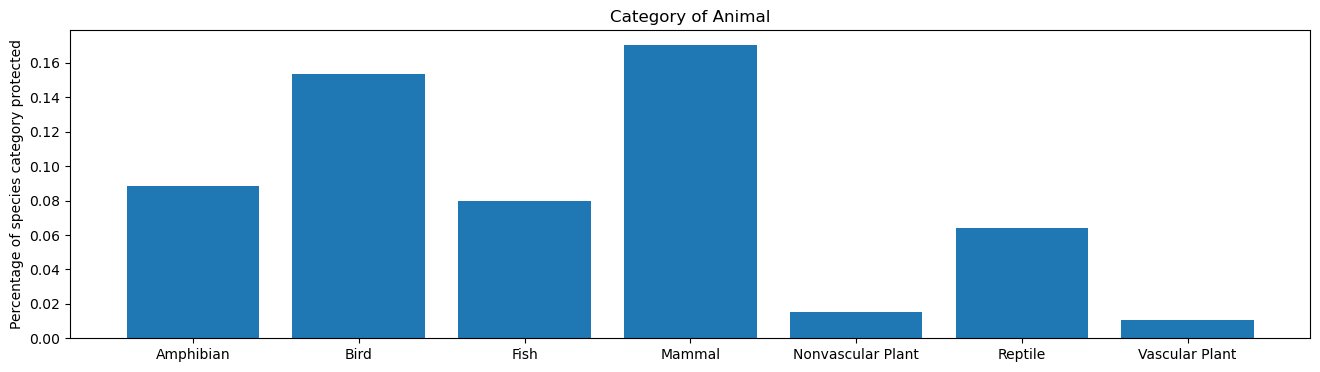

In [260]:
category_pivot["percent"] = category_pivot["protected"] / (category_pivot["protected"] + category_pivot["not_protected"])
print(category_pivot)
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(category_pivot)), category_pivot["percent"].values)
ax.set_xticks(range(len(category_pivot)))
ax.set_xticklabels(category_pivot["category"].values)
plt.ylabel("Percentage of species category protected")
plt.title("Category of Animal")
plt.show()

*Here, the results of the above significance tests are more clearly apparent.*

## Step 5
Conservationists have been recording sightings of different species at several national parks for the past 7 days.  They've saved sent you their observations in a file called `observations.csv`.  Load `observations.csv` into a variable called `observations`, then use `head` to view the data.

In [241]:
observations = pd.read_csv("observations.csv")
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.  We'd like to know which rows of `species` are referring to sheep.

Use apply and a lambda function to create a new column in species called is_sheep which is True if the common_names contains 'Sheep', and False otherwise.

In [242]:
species["is_sheep"] = species["common_names"].apply(lambda names: True if "Sheep" in names else False)
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  is_sheep  
0         False     False  
1         False     False  
2         False     False  
3         False      True  
4         False     False  


Select the rows of `species` where `is_sheep` is `True` and examine the results.

In [243]:
sheep = species[species["is_sheep"] == True]
print(sheep.head())

            category     scientific_name  \
3             Mammal          Ovis aries   
1139  Vascular Plant    Rumex acetosella   
2233  Vascular Plant  Festuca filiformis   
3014          Mammal     Ovis canadensis   
3761  Vascular Plant   Rumex paucifolius   

                                           common_names conservation_status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1139                        Sheep Sorrel, Sheep Sorrell     No Intervention   
2233                              Fineleaf Sheep Fescue     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
3761   Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock     No Intervention   

      is_protected  is_sheep  
3            False      True  
1139         False      True  
2233         False      True  
3014          True      True  
3761         False      True  


Many of the results are actually plants.  Select the rows of `species` where `is_sheep` is `True` and `category` is `Mammal`.  Save the results to the variable `sheep_species`.

In [244]:
sheep_species = sheep[sheep["category"] == "Mammal"]
print(sheep_species.head())

     category          scientific_name  \
3      Mammal               Ovis aries   
3014   Mammal          Ovis canadensis   
4446   Mammal  Ovis canadensis sierrae   

                                           common_names conservation_status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
4446                        Sierra Nevada Bighorn Sheep          Endangered   

      is_protected  is_sheep  
3            False      True  
3014          True      True  
4446          True      True  


Now merge `sheep_species` with `observations` to get a DataFrame with observations of sheep.  Save this DataFrame as `sheep_observations`.

In [245]:
sheep_observations = pd.merge(sheep_species, observations, how="left")
sheep_observations

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep,park_name,observations
0,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yosemite National Park,126
1,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Great Smoky Mountains National Park,76
2,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Bryce National Park,119
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True,Yellowstone National Park,221
4,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yellowstone National Park,219
5,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Bryce National Park,109
6,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Yosemite National Park,117
7,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True,Great Smoky Mountains National Park,48
8,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yellowstone National Park,67
9,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True,Yosemite National Park,39


How many total sheep observations (across all three species) were made at each national park?  Use `groupby` to get the `sum` of `observations` for each `park_name`.  Save your answer to `obs_by_park`.

This is the total number of sheep observed in each park over the past 7 days.

In [246]:
obs_by_park = sheep_observations.groupby("park_name")["observations"].sum().reset_index()
print(obs_by_park)

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


Create a bar chart showing the different number of observations per week at each park.

1. Start by creating a wide figure with `figsize=(16, 4)`
1. Start by creating an axes object called `ax` using `plt.subplot`.
2. Create a bar chart whose heights are equal to `observations` column of `obs_by_park`.
3. Create an x-tick for each of the bars.
4. Label each x-tick with the label from `park_name` in `obs_by_park`
5. Label the y-axis `Number of Observations`
6. Title the graph `Observations of Sheep per Week`
7. Plot the grap using `plt.show()`

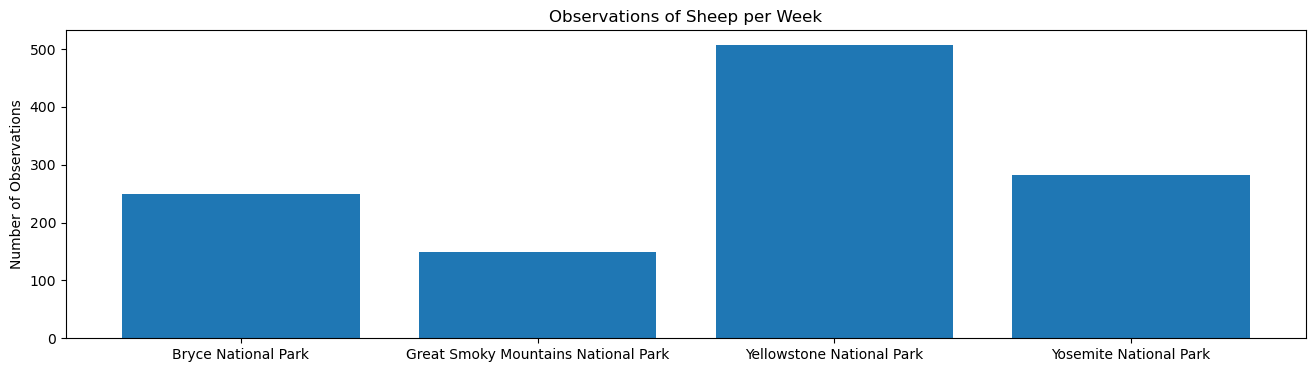

In [247]:
plt.figure(figsize=(16, 4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park)), obs_by_park["observations"].values)
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(obs_by_park["park_name"].values)
plt.ylabel("Number of Observations")
plt.title("Observations of Sheep per Week")
plt.show()

Our scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage points.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

Use <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">Codecademy's sample size calculator</a> to calculate the number of sheep that they would need to observe from each park.  Use the default level of significance (90%).

Remember that "Minimum Detectable Effect" is a percent of the baseline.

In [248]:
base = 0.15
reduction_min = 0.05
mde = reduction_min / base
sample_size = 870

How many weeks would you need to observe sheep at Bryce National Park in order to observe enough sheep?  How many weeks would you need to observe at Yellowstone National Park to observe enough sheep?

In [249]:
import math
print("Bryce: " + str(math.ceil((sample_size/obs_by_park[obs_by_park["park_name"] == "Bryce National Park"].observations))) + " weeks")
print("Bryce: " + str(math.ceil((sample_size/obs_by_park[obs_by_park["park_name"] == "Yellowstone National Park"].observations))) + " weeks")

Bryce: 4 weeks
Bryce: 2 weeks


# Conclusions

Mammals are the category of animal most likely to be endangered, though not significantly more than birds.

Sheep are most likely to be observed in Yellowstone Park, making for the ideal place out of the four parks to observe sheep on a general basis.